Paso 1. Lectura del conjunto de datos procesado

In [1]:

import pandas as pd

train_data = pd.read_csv("/workspaces/joseventarbolico/data/processed/clean_diabetes_train.csv")
test_data = pd.read_csv("/workspaces/joseventarbolico/data/processed/clean_diabetes_test.csv")

In [2]:
train_data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.422111,0.000000,0.096499,0.000000,0
1,0.529412,0.562814,0.420268,0.514091,0.483333,1
2,0.058824,0.698492,0.427720,0.245944,0.016667,0
3,0.000000,0.809045,0.326379,0.075149,0.733333,0
4,0.352941,0.673367,0.688525,0.068318,0.416667,1


In [3]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Paso 2: Inicialización y entrenamiento del modelo

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

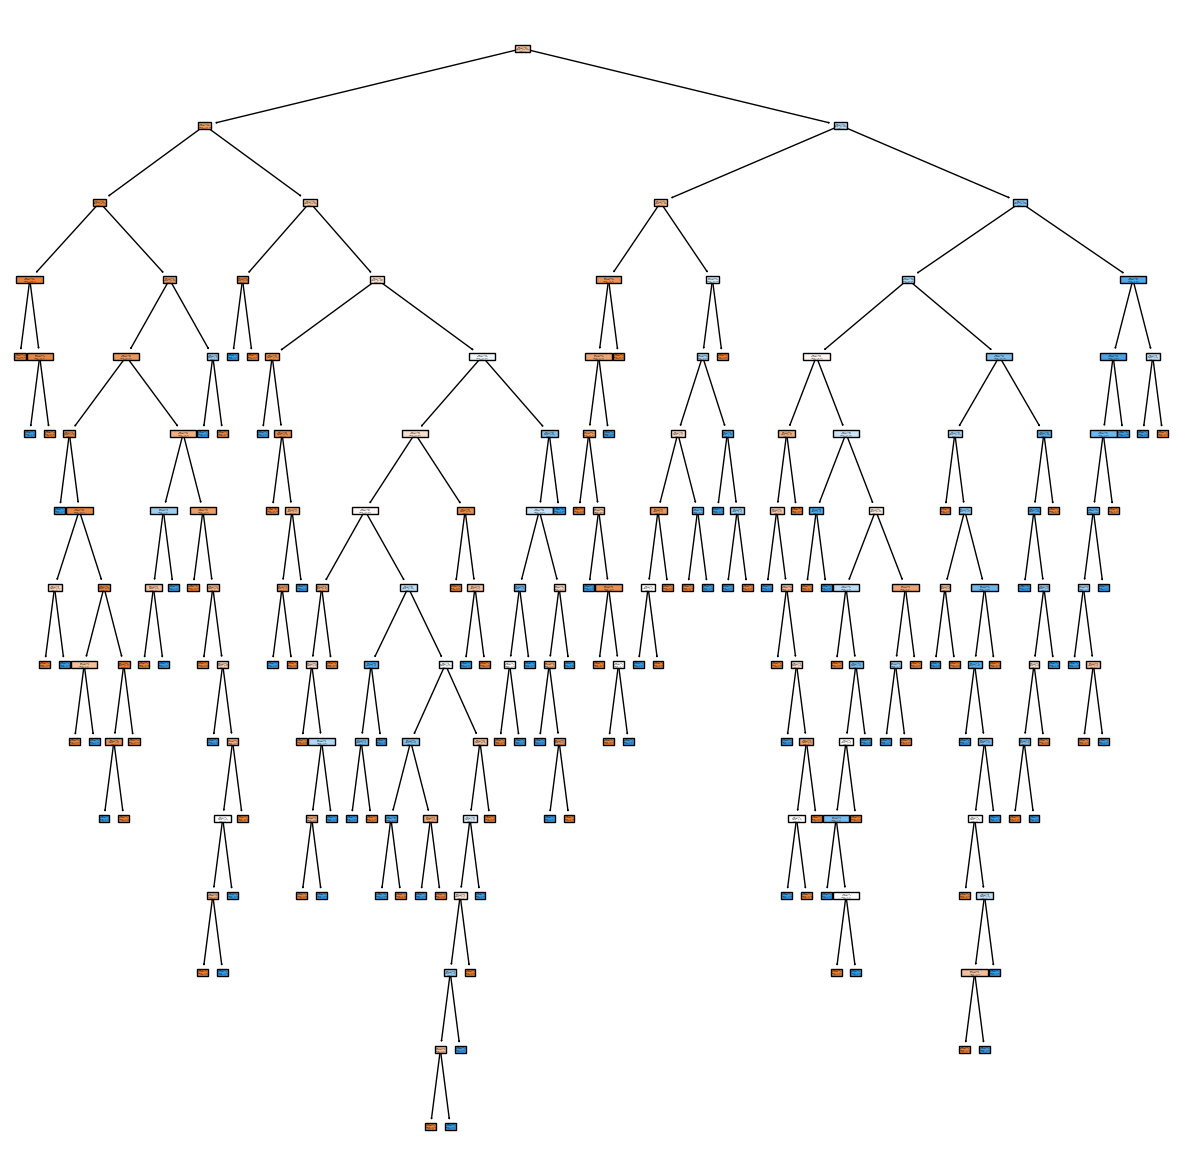

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

Paso 3: Predicción del modelo

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7077922077922078

70% de accuracy, hay que mejorar 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [9]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [10]:
model_grid =  DecisionTreeClassifier( criterion = "gini", max_depth = None, min_samples_leaf = 4, min_samples_split = 2 )
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7207792207792207

guardo el modelo 

In [12]:

from pickle import dump

dump(model, open("decision_tree_regressor_default_42.sav", "wb"))